In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
fpath = '/storage/shared/apollo/same-day/1000398_2018-02-15.csv'
df = pd.read_csv(fpath)

In [5]:
df.head()

,Unnamed: 0,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,0,92.0,122.0,29.0,-107.0,31.0,75.0,-43.0,4.0,39.0,58.0,58.0,63.0
1,1,97.0,112.0,14.0,-104.0,41.0,63.0,-39.0,14.0,34.0,63.0,53.0,63.0
2,2,97.0,92.0,-4.0,-95.0,51.0,43.0,-29.0,24.0,34.0,58.0,53.0,53.0
3,3,97.0,82.0,-14.0,-90.0,56.0,34.0,-19.0,29.0,34.0,58.0,53.0,53.0
4,4,97.0,82.0,-14.0,-90.0,56.0,34.0,-14.0,34.0,29.0,53.0,48.0,43.0


In [4]:
df.values[::2,1:].shape

(2500, 12)

In [4]:
tab = '/storage/shared/apollo/same-day/tabular_data.csv'
df_tab = pd.read_csv(tab)

In [5]:
len(df_tab), len(df_tab['QuantaID'].unique())

(9226, 5072)

In [6]:
len(set(df_tab['QuantaID']))

5072

In [7]:
df_tab.head(20)

,Unnamed: 0,QuantaID,Date_of_Cath,Age_at_Cath,Sex,PAP_sys,PAP_dia,PAP_mean,PCWP_sys,PCWP_dia,PCWP_mean,CO,PVR,Admit_Diag
0,1,1398820,2016-08-19,80,True,53.0,31.0,38.0,29.0,33.0,26.0,4.10,2.926829,"['Acute ischemic heart disease, unspecified', ..."
1,4,1654372,2010-06-04,87,False,49.0,25.0,34.0,26.0,25.0,23.0,2.77,3.971119,['Acute systolic heart failure']
2,8,303155,2010-03-18,86,True,26.0,9.0,14.0,NaN,15.0,9.0,4.17,1.199041,"['SEMI initial episode of care', 'CAD of vein ..."
3,9,303155,2010-03-25,86,True,29.0,8.0,17.0,NaN,15.0,13.0,3.61,1.108033,"['Atherosclerosis of Renal Artery', 'Aortic st..."
4,10,1092577,2011-07-12,77,False,49.0,20.0,28.0,NaN,34.0,19.0,7.73,1.164295,"['CHF: Unspecified', 'Essential Hypertension, ..."
5,13,70309,2013-02-13,80,False,33.0,13.0,20.0,NaN,NaN,12.0,2.30,3.478261,"['Abnormal function study, unspecified', 'Hype..."
6,15,314037,2017-12-29,82,True,47.0,16.0,29.0,21.0,13.0,14.0,2.70,5.555556,['Chronic diastolic (congestive) heart failure']
7,21,1428045,2010-01-08,82,True,34.0,13.0,23.0,NaN,14.0,13.0,3.15,3.174603,"['CAD of native vessel', 'Unstable Angina']"
8,23,2034046,2017-04-28,90,False,57.0,20.0,36.0,18.0,15.0,11.0,5.50,4.545455,['Atherosclerotic heart disease of native coro...
9,25,439655,2016-01-27,88,True,54.0,18.0,31.0,20.0,29.0,18.0,4.83,2.691511,['Atherosclerotic heart disease of native coro...


In [8]:
np.mean(df_tab['PCWP_mean'] > 30)

0.053652720572295684

Text(0, 0.5, 'Counts')

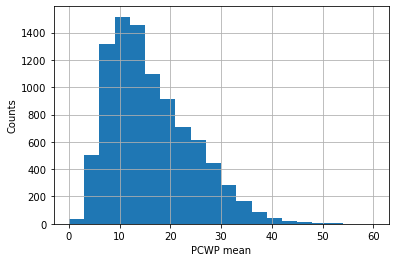

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
df_tab['PCWP_mean'].hist(bins=20)
plt.xlabel('PCWP mean')
plt.ylabel('Counts')

In [10]:
df2 = df_tab.dropna(subset=['CO'])

In [11]:
df_tab['CO'].iloc[15] <4

False

In [12]:
len(df_tab.dropna(subset=['CO'])['QuantaID'].unique())

4051

In [13]:
%matplotlib inline

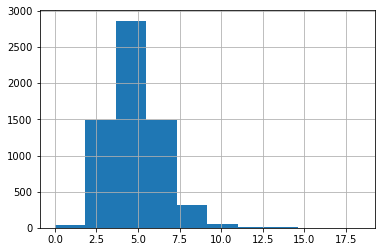

In [14]:
df_tab['CO'].hist()

# Old stuff

In [11]:
# split by quanta id into train/val/test; fix seed
# each dataloader keeps the relevant split of df_tab
# when we sample an idx in getitem:
#    grab the quanta ID and date of cath
#    use it to form the fname for the ecg
#    load the ecg and normalise it 
#    extract PAP_mean and if it's above 20, set y =1. else y = 0
#    return x and y

In [27]:
frac_train = 0.7
frac_val = 0.1
frac_test = 1 - frac_val - frac_train

frac_val_end = frac_train + frac_val

rng = np.random.RandomState(seed=0)

uids = df_tab['QuantaID'].unique()
rng.shuffle(uids)

train_ids = uids[:int(frac_train*len(uids))]
val_ids = uids[int(frac_train*len(uids)) : int(frac_val_end*len(uids))]
test_ids = uids[int(frac_val_end*len(uids)):]

train_df = df_tab[df_tab['QuantaID'].isin(train_ids)]
val_df = df_tab[df_tab['QuantaID'].isin(val_ids)]
test_df = df_tab[df_tab['QuantaID'].isin(test_ids)]

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
np.mean(train_df['PAP_mean'] > 20)

0.6190774042220485

In [35]:
np.mean(val_df['PAP_mean'] > 20)

0.61441647597254

In [36]:
np.mean(test_df['PAP_mean'] > 20)

0.6185355862775218

In [41]:
from torch.utils.data import Dataset, DataLoader, Subset

In [51]:
import copy
def norm_and_dataloader_augment(df, bs=32, shuffle=True, augment=False):
    class ECGDataset(Dataset):
        def __init__(self, df, augment=False):

            
            self.augment = augment
            self.df = df

        def __len__(self):
            return len(self.df)

        def do_augment(self, x):
            x = _rand_add_noise(x)
            x = _rand_crop_ecg(x)
            return x
        
        def __getitem__(self, idx):
            row = self.df.iloc[idx]
            # load ECG
            qid = row['QuantaID']
            doc = row['Date_of_Cath']
            fname = f'/storage/shared/apollo/same-day/{qid}_{doc}.csv'
            x = pd.read_csv(fname).values[::2,1:].astype(np.float32)
            y = int(row['PAP_mean'] > 20)
            x = (x-x.mean())/x.std()
            if self.augment:
                x = self.do_augment(x).astype(np.float32)
            sample = (x[:2496,:].T, y)
            return sample
    dataset = ECGDataset(df, augment)
    dataloader =DataLoader(dataset, batch_size=bs, shuffle=shuffle, num_workers=2)
    return dataloader

In [52]:
train_dl = norm_and_dataloader_augment(train_df)

In [53]:
x, y=iter(train_dl).next()

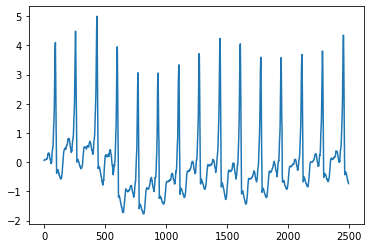

In [58]:
plt.plot(x[31, 10, :].numpy().T)

In [62]:
len(train_df), len(val_df), len(test_df)

(6395, 874, 1953)